In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df0 = pd.read_csv('D:\\payment_fraud.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 5 columns):
accountAgeDays          39221 non-null int64
numItems                39221 non-null int64
localTime               39221 non-null float64
paymentMethod           39221 non-null object
paymentMethodAgeDays    39221 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ MB


Видим, что в данных нет пропусков, которые требуют замещения или удаления

In [2]:
df0['paymentMethod'].head()

0         paypal
1    storecredit
2     creditcard
3     creditcard
4     creditcard
Name: paymentMethod, dtype: object

Преобразование качественного признака в составной количественный с сохранением «равноправия» значений признака:

In [59]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
cols_np = enc.fit_transform(df0.paymentMethod.to_numpy().reshape(-1, 1)).toarray()

df1 = df0.drop(['paymentMethod'], axis=1).join(pd.DataFrame(cols_np, columns=['paypal', 'storecredit', 'creditcard']))

In [60]:
df1.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paypal,storecredit,creditcard
0,29,1,4.745402,28.204861,0.0,1.0,0.0
1,725,1,4.742303,0.000000,0.0,0.0,1.0
2,845,1,4.921318,0.000000,1.0,0.0,0.0
3,503,1,4.886641,0.000000,1.0,0.0,0.0
4,2000,1,5.040929,0.000000,1.0,0.0,0.0


Уменьшение размерности:

In [61]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full', n_components=3) #n_components=2

df2 = df1.copy()
fit = pca.fit_transform(df2)
print(pca.components_)

[[ 9.91548123e-01 -2.48364031e-05 -6.67426462e-06  1.29739432e-01
   2.76883376e-06 -1.49167755e-06 -1.27715621e-06]
 [-1.29739428e-01  1.03125482e-04 -4.40771681e-05  9.91548117e-01
   8.12664935e-07  3.89521729e-08 -8.51617108e-07]
 [-1.53994045e-06  3.85183396e-02  1.49146374e-04 -4.82293263e-06
   7.32841394e-01 -6.77010098e-01 -5.58312963e-02]]


In [62]:
df2 = pd.DataFrame(fit, columns=['x1', 'x2', 'x3',])#'x4'])
df2.head()

,x1,x2,x3
0,-833.813197,13.859109,-1.038489
1,-147.354986,-104.406011,-0.418246
2,-28.369208,-119.974748,0.370269
3,-367.478666,-75.603862,0.370790
4,1116.868873,-269.823793,0.368508


In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df3 = pd.DataFrame(ss.fit_transform(df2), columns=['x1', 'x2', 'x3',])
df3.head()

,x1,x2,x3
0,-1.028265,0.052186,-1.722779
1,-0.181719,-0.393136,-0.693841
2,-0.034985,-0.451760,0.614249
3,-0.453177,-0.284683,0.615114
4,1.377331,-1.016010,0.611328


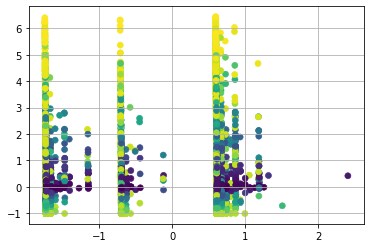

In [84]:
plt.figure()
plt.grid()
plt.scatter(df3['x3'], df3['x2'], c=df3['x1'], lw=.6)
#plt.axis('equal')
plt.show()

In [47]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [100]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df2.sample(int(df3.shape[0]*0.1)).to_numpy())

In [90]:
model.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': 0,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': None}

In [92]:
len(model.labels_)

3922

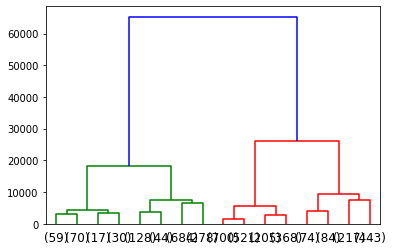

In [101]:
plot_dendrogram(model, truncate_mode='level', p=3)
#plt.savefig('test.png')